## Q1. Plotting the max. and min. temp.

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
Max = [39,41,43,47,49,51,45,38,37,29,27,25]
Min = [21,23,27,28,32,35,31,28,21,19,17,18]
months = list(range(1,13))


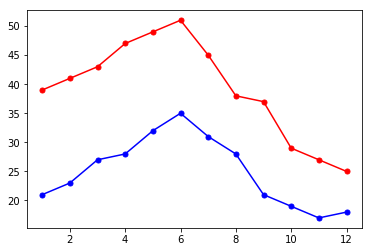

In [192]:
plt.plot(months,Max,marker='o', ms=5, linestyle='solid', c='r')
plt.plot(months,Min,marker='o',ms=5, c='b',linestyle='solid')

In [209]:
# Import curve fitting package from scipy
from scipy.optimize import curve_fit

def periodic(x, a, b):
    return a+b*np.cos(x)

In [214]:
# Fit the dummy periodic data
pars, cov = curve_fit(f=periodic, xdata=months, ydata=Max, p0=[0, 0], bounds=(-np.inf, np.inf))

In [215]:
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
res = Max - periodic(months, *pars)

In [216]:
pars

array([39.31254091,  1.31857514])

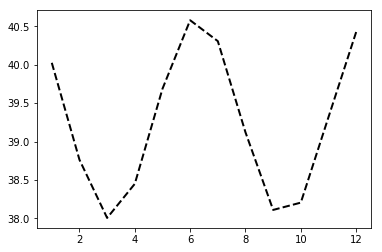

In [217]:
# Plot the fit data as an overlay on the scatter data
plt.plot(months, periodic(months, *pars), linestyle='--', linewidth=2, color='black')



## Q2. Visualization using matplotlib

In [124]:
URL='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(URL)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [125]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x26819329240>,
 [Text(-0.699399,1.43904,'male'), Text(0.699399,-1.43904,'female')])

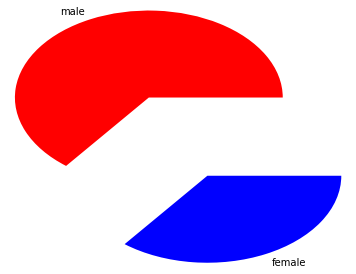

In [126]:
plt.pie([843,466], explode=(0.5,0.5),labels=['male','female'],colors=['red','blue'])

In [151]:
titanic = titanic[titanic['sex'].notna()]

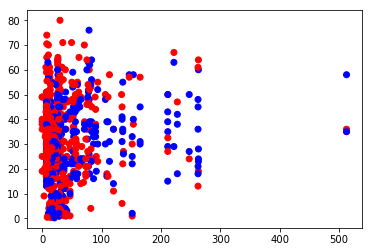

In [153]:
sex =['male', 'female']
colors = {'male':'red', 'female':'blue'}

fig, ax = plt.subplots()

ax.scatter(x=titanic['fare'],y=titanic['age'],c=titanic['sex'].apply(lambda x: colors[x]))

plt.show()